# Imports

In [1]:
from cbrain.imports import *
from cbrain.data_generator import *
from cbrain.cam_constants import *
from cbrain.losses import *
from cbrain.utils import limit_mem
from cbrain.layers import *
import tensorflow as tf
import tensorflow.math as tfm
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import xarray as xr
import numpy as np
from cbrain.model_diagnostics import ModelDiagnostics
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as imag

# Otherwise tensorflow will use ALL your GPU RAM for no reason
limit_mem()

/data11/home/tbeucler/CBRAIN-CAM/notebooks/tbeucler_devlog


# Plot properties

In [2]:
TRAINDIR = '/local/Tom.Beucler/SPCAM_PHYS/'
alpha_array = [0,0.01,0.25,0.5,0.75,0.99,1] # Loop over weight given to MSE and conservation constraints
config_fn = '/filer/z-sv-pool12c/t/Tom.Beucler/SPCAM/CBRAIN-CAM/pp_config/8col_rad_tbeucler_local_PostProc.yml'
data_fn = '/local/Tom.Beucler/SPCAM_PHYS/8col009_01_valid.nc'
dict_lay = {'SurRadLayer':SurRadLayer,'MassConsLayer':MassConsLayer,'EntConsLayer':EntConsLayer,\
           'weak_loss_0':mse,'weak_loss_1':mse}
fz = 15
lw = 4
siz = 100
S0 = 320 # Representative mean solar insolation for normalization purposes
S0max = 1410.6442 # Max solar insolation for normalization purposes
SN = S0/100 # Representative target = mean insolation / 4
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YMIN = -1 # Representative value for conserving network
YTEXT = 0.3 # Text placement

In [3]:
plt.rc('text', usetex=False)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
mpl.rcParams['lines.linewidth'] = lw
plt.close('all')

# Figure 2

## Load data

In [23]:
TRAINDIR = '/local/Tom.Beucler/SPCAM_PHYS/'
alpha_array = [0,0.01,0.25,0.5,0.75,0.99,1] # Loop over weight given to MSE and conservation constraints
NNarray = ['MLRL0','JNNL','JNNL0.01','JNNC']
config_fn = '/filer/z-sv-pool12c/t/Tom.Beucler/SPCAM/CBRAIN-CAM/pp_config/8col_rad_tbeucler_local_PostProc.yml'
data_fn = '/local/Tom.Beucler/SPCAM_PHYS/8col009_01_valid.nc'
DATASET = ['train','valid','test']
dict_lay = {'SurRadLayer':SurRadLayer,'MassConsLayer':MassConsLayer,'EntConsLayer':EntConsLayer,\
           'weak_loss_0':mse,'weak_loss_1':mse}
fz = 15
lw = 4
siz = 100
S0 = 320 # Representative mean solar insolation for normalization purposes
S0max = 1410.6442 # Max solar insolation for normalization purposes
SN = S0/100 # Representative target = mean insolation / 4
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.2 # Text placement
YMIN = -1 # Representative value for conserving network
YTEXT = 0.6 # Text placement

In [24]:
# Save reduced data to make figure
pathHOME = '/export/home/tbeucler/'
#pathPKL = '/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/PKL_DATA/'
pathPKL = '/export/home/tbeucler/CBRAIN-CAM/notebooks/tbeucler_devlog/PKL_DATA/'

In [25]:
# Load LCnet diagnostics
hf = open(pathPKL+'2020_03_11_across_alpha.pkl','rb')
S = pickle.load(hf)
hf.close()

In [26]:
# Load comparison between UCnet, linear, etc.
hf = open(pathPKL+'2020_03_06_comparison.pkl','rb')
S2 = pickle.load(hf)
hf.close()

In [27]:
MSEplot = {}
PENplot = {}

for j,datas in enumerate(DATASET):
    #print('datas=',datas)
    MSEplot[datas] = {}
    PENplot[datas] = {}
    
    for alpha in alpha_array:
        #print('alpha = ',str(alpha))
        MSEplot[datas][alpha] = np.log10(S['MSEt'][datas][alpha][0])
        PENplot[datas][alpha] = np.log10(S['RESt'][datas][alpha][0])
        
    for NNs in NNarray:
        MSEplot[datas][NNs] = np.log10(S2['MSEt'][datas][NNs][0])
        PENplot[datas][NNs] = np.log10(S2['RESt'][datas][NNs][0])

In [28]:
datas = 'valid'

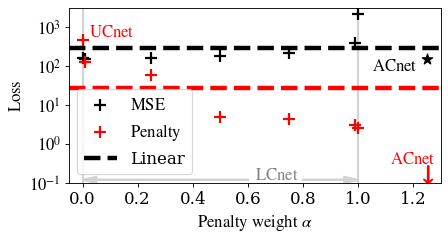

In [47]:
f = plt.figure(num=None, figsize=(6,3), dpi=80, facecolor='w', edgecolor='k')
plt.gcf().subplots_adjust(bottom=0.15) # Make room for xlabels

### Subplot 1 ###

ax = f.add_subplot(1,1,1)
MSEs = {}; PENs = {};

plt.axvline(x=0,color='lightgray',linewidth=lw/2,zorder=0)
plt.axvline(x=1,color='lightgray',linewidth=lw/2,zorder=0)

STR = 'MLRL0'
Hlin1 = plt.axhline(y=MSEplot[datas][STR],c='k',linestyle='--',zorder=1)
Hlin2 = plt.axhline(y=PENplot[datas][STR],c='r',linestyle='--',zorder=1)

for alpha in alpha_array:
    STR = alpha
    MSEs[str(alpha)] = plt.scatter(alpha,MSEplot[datas][STR],c='k',s=siz,marker='+',linewidth=lw/2)
    PENs[str(alpha)] = plt.scatter(alpha,PENplot[datas][STR],c='r',s=siz,marker='+',linewidth=lw/2)

STR = 'JNNC'
MSEs['NNA'] = plt.scatter(XNNA,MSEplot[datas][STR],c='k',s=siz,marker='*')
PENs['NNA'] = plt.scatter(XNNA,YMIN+0.2,c='r',s=3*siz,marker="$\downarrow$")
MSEt = plt.text(XNNA-XTEXT,MSEplot[datas][STR]-YTEXT/2,s='$\mathrm{ACnet}$',color='k')
PENt = plt.text(XNNA-2*XTEXT/3,YMIN+0.2+YTEXT/2,s='$\mathrm{ACnet}$',color='r')
PENu = plt.text(0.025,2.75,s='$\mathrm{UCnet}$',color='r')
    
plt.xlim((-0.05,1.3))
plt.ylim((YMIN,3.5))

plt.xlabel(r'$\mathrm{Penalty\ weight\ }\alpha$')
plt.ylabel(r'$\mathrm{Loss}$')

plt.legend((MSEs['0'],PENs['0'],Hlin1),\
           ('$\mathrm{MSE}$','$\mathrm{Penalty}$','Linear'),
          loc='lower left')

# Add LCnet legend
plt.arrow(0.6, -0.925, -0.55, 0, color='lightgray', linewidth=lw/2,head_width=0.15,head_length=0.05)
plt.arrow(0.8, -0.925, 0.15, 0, color='lightgray', linewidth=lw/2,head_width=0.15,head_length=0.05)
PENu = plt.text(0.625,-0.925,s='$\mathrm{LCnet}$',color='gray')

plt.draw()
# Change y labels to 10^n
labels = [item.get_text() for item in ax.get_yticklabels()]
for ilab,lab in enumerate(labels):
    #print(ilab,lab)
    labels[ilab]='$10^{'+lab+'}$';
ax.set_yticklabels(labels);


# Save figure
plt.savefig(pathHOME+'IGARSS_Fig2_'+datas+'.pdf',format='pdf')